# Exploratory Data Analysis on Titles

_This notebook will be used to perform exploratory analysis on the titles, from analysis on the length of the titles to visualizing character counts and word counts by class._

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/title.csv')

In [3]:
target = df['subreddit']

_Created columns that numbered the character count and the word count of the titles._

In [4]:
df['char_count'] = df['title'].map(len)

In [5]:
df['word_count'] = df['title'].map(lambda x: len(x.split()))

In [6]:
df.head()

,title,subreddit,char_count,word_count
0,Husband was screwing his secretary up the ass ...,0,69,13
1,Why does Batman wear Dark clothing?,0,35,6
2,"A man is in court. The Judges says, on the 3rd...",0,148,31
3,A poor old lady was forced to sell her valuabl...,0,67,13
4,How do you get a nun pregnant?,0,30,7


_Taking a quick look at the percentage of class distribution. The majority percentage will be the baseline value._

In [7]:
df['subreddit'].value_counts(normalize=True)

0    0.511884
1    0.488116
Name: subreddit, dtype: float64

## Visualizing character count and word count of titles

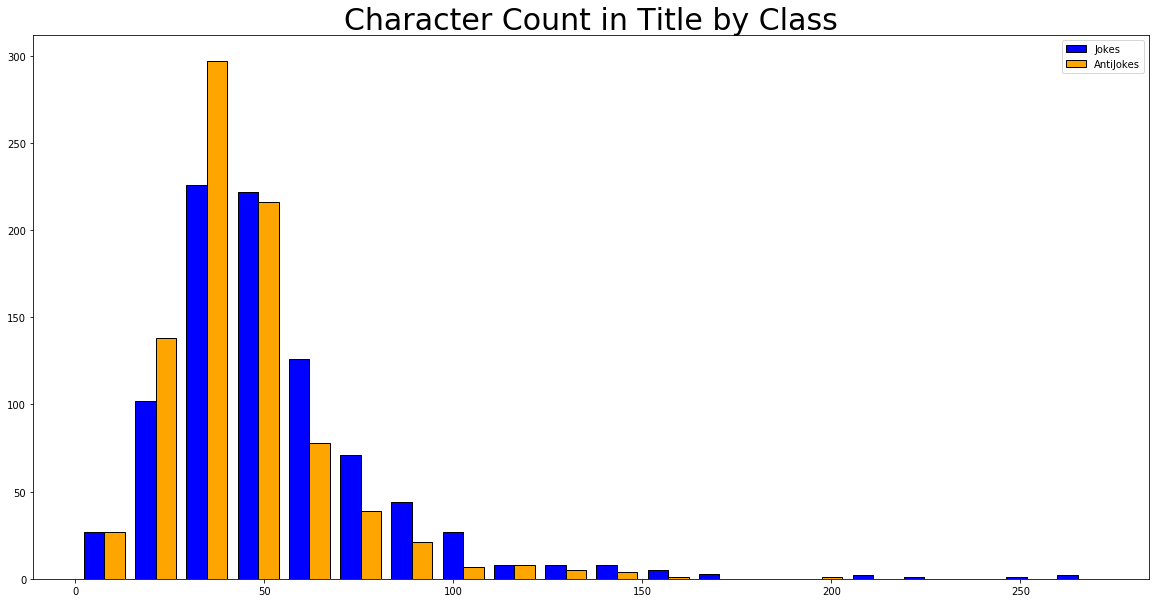

In [8]:
plt.figure(figsize=(20,10))
plt.hist([df[df['subreddit']==0]['char_count'], 
          df[df['subreddit']==1]['char_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Character Count in Title by Class', fontsize=30)
plt.legend(['Jokes', 'AntiJokes']);

_It seems that the character count for AntiJokes have a tighter distribution around the mean (around 35 characters), whereas the distribution of character counts in Jokes are more spread out, having several outliers._

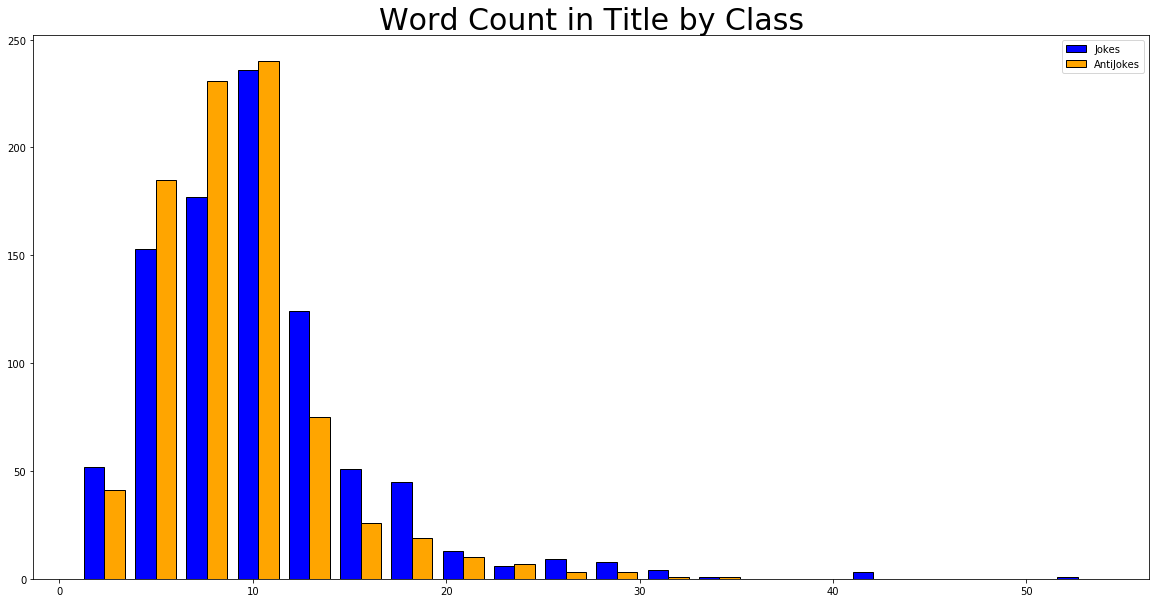

In [9]:
plt.figure(figsize=(20,10))
plt.hist([df[df['subreddit']==0]['word_count'], 
          df[df['subreddit']==1]['word_count']],
         bins=20, color=['blue', 'orange'], ec='k')
plt.title('Word Count in Title by Class', fontsize=30)
plt.legend(['Jokes', 'AntiJokes']);

_The word counts in titles for Jokes and AntiJokes seem to be similar. All in all, the distributions  of the character and word counts don't seem to point to a certain conclusion. However, looking at the distribution for the selftext (post content) might be more revealing._

## Lemmatizing and CountVectorizing

_First, titles must be tokenized and lemmatized._

In [10]:
# Tokenizing by alphanumeric characters
tokenizer = RegexpTokenizer('\w+')

# Making all tokens lowercase
tokens = [tokenizer.tokenize(title.lower()) for title in (df['title'])]

In [11]:
tokens

[['husband',
  'was',
  'screwing',
  'his',
  'secretary',
  'up',
  'the',
  'ass',
  'when',
  'his',
  'wife',
  'walked',
  'in'],
 ['why', 'does', 'batman', 'wear', 'dark', 'clothing'],
 ['a',
  'man',
  'is',
  'in',
  'court',
  'the',
  'judges',
  'says',
  'on',
  'the',
  '3rd',
  'august',
  'you',
  'are',
  'accused',
  'of',
  'killing',
  'your',
  'wife',
  'by',
  'beating',
  'her',
  'to',
  'death',
  'with',
  'a',
  'hammer',
  'how',
  'do',
  'you',
  'plead'],
 ['a',
  'poor',
  'old',
  'lady',
  'was',
  'forced',
  'to',
  'sell',
  'her',
  'valuables',
  'to',
  'avoid',
  'eviction'],
 ['how', 'do', 'you', 'get', 'a', 'nun', 'pregnant'],
 ['i',
  'm',
  'a',
  'masochist',
  'there',
  's',
  'nothing',
  'i',
  'love',
  'more',
  'than',
  'getting',
  'up',
  'at',
  '3',
  'in',
  'the',
  'morning',
  'for',
  'a',
  'cold',
  'shower'],
 ['son', 'i', 'found', 'a', 'pack', 'of', 'condoms', 'in', 'your', 'room'],
 ['a',
  'blonde',
  'guy',
  'gets'

In [12]:
# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

# Creating a list of titles that are lemmatized
# First had to lemmatize for each word in title, 
# then rejoin words into one string for title
lems = []
for title in tokens:
    tok_title = []
    for word in title:
        tok_title.append(lemmatizer.lemmatize(word))
    titles = " ".join(tok_title)
    lems.append(titles)

In [13]:
lems

['husband wa screwing his secretary up the as when his wife walked in',
 'why doe batman wear dark clothing',
 'a man is in court the judge say on the 3rd august you are accused of killing your wife by beating her to death with a hammer how do you plead',
 'a poor old lady wa forced to sell her valuable to avoid eviction',
 'how do you get a nun pregnant',
 'i m a masochist there s nothing i love more than getting up at 3 in the morning for a cold shower',
 'son i found a pack of condom in your room',
 'a blonde guy get home early from work and hears strange noise coming from the bedroom he rush upstairs to find his wife naked on the bed sweating and panting',
 'what is the most popular type of tree in california',
 'before graduating to full priest the candidate had to undergo',
 'woman are like snowflake',
 'minecraft is racist',
 'why did the mexican take a xanax',
 'a i sat there scratching my as and spying on my neighbor washing her beaver one thing crossed my mind',
 'who wa the 

In [14]:
# Initializing a count vectorizer and fitting it
vect = CountVectorizer(analyzer='word', stop_words = 'english', min_df = 3)
terms = vect.fit_transform(lems)
text = pd.DataFrame(terms.todense(), columns = vect.get_feature_names())

In [15]:
text.head()

,10,100,1000,15,17,2018,24,50,69,able,...,write,wrong,wrote,year,yellow,yesterday,yo,young,youtube,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Insert the target back into the DataFrame
text.insert(0, 'target',target)

In [17]:
text.head()

,target,10,100,1000,15,17,2018,24,50,69,...,write,wrong,wrote,year,yellow,yesterday,yo,young,youtube,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Looking at the most common words

In [18]:
# Creating a dictionary for the most common words to the counts
term_counts = {col : text[col].sum() for col in text.columns[1:]}

# Creating a DataFrame for the Term Count Distribution (tcd)
tcd = pd.DataFrame(term_counts, index = ['counts'])
tcd = tcd.T
tcd.head()

,counts
10,4
100,6
1000,4
15,3
17,4


In [19]:
# Sort the tcd by count values
tcd.sort_values(by="counts", ascending=False).head(10)

,counts
did,162
like,160
wa,107
say,89
man,83
joke,77
walk,65
doe,63
bar,62
woman,57


In [22]:
# Take the top 20 words and visualize them into a heatmap
top20 = list(tcd.sort_values(by = 'counts', ascending = False).head(20).index)
# Also added target to the list
top20.append('target')

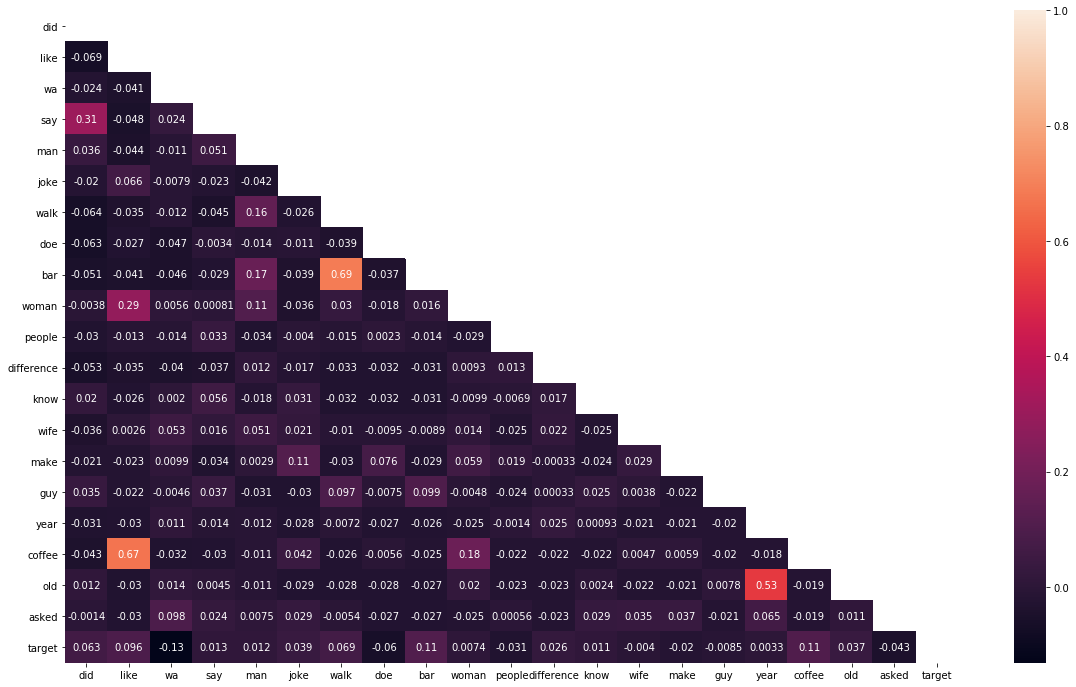

In [23]:
# Creating the heatmap
plt.figure(figsize = (20,12))
corr = text[top20].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask, annot=True);

_There seems to be no strong correlations between the target and any words according to the visualization._

In [28]:
# Terms that are least correlated to the target
text.corr().sort_values(by='target')['target'].head(12)

wa          -0.131650
thought     -0.085093
wanted      -0.074566
lady        -0.070719
home        -0.070719
trump       -0.070289
christmas   -0.069718
new         -0.066037
morning     -0.063659
dating      -0.062332
popular     -0.062332
war         -0.062332
Name: target, dtype: float64

In [29]:
# Terms that are most correlated to the target
text.corr().sort_values(by='target', ascending=False)['target'].head(12)

target     1.000000
virgin     0.110912
bar        0.108702
coffee     0.105602
like       0.095901
black      0.094831
anti       0.091269
worse      0.085711
anymore    0.079706
end        0.070231
walk       0.068653
road       0.067577
Name: target, dtype: float64

_There aren't any words that are strongly negatively correlated with the target (antijokes) except for 'wa' which is the lemmatized word 'was'. Some of the words that are correlated positively with the target are 'virgin', 'bar', and 'coffee'. Seems these words are often appearing in antijokes._

_Next, I used `groupby` to get some aggregates (mainly `sum` and `mean`) over the classes._

In [30]:
# Getting the term frequency relative to the target
text.groupby('target').mean().T.sort_values(by=0, ascending=False)

target,0,1
wa,0.095130,0.027316
did,0.075878,0.112827
like,0.052095,0.135392
say,0.048698,0.054632
doe,0.047565,0.024941
man,0.045300,0.051069
joke,0.036240,0.053444
people,0.035108,0.023753
woman,0.031710,0.034442
know,0.024915,0.028504


In [31]:
text.groupby('target').sum().T.sort_values(by=0, ascending=False)

target,0,1
wa,84,23
did,67,95
like,46,114
say,43,46
doe,42,21
man,40,43
joke,32,45
people,31,20
woman,28,29
know,22,24


### Looking for common words between the classes and conducting a hypothesis test to see if those words have the same mean frequency

In [32]:
# Getting the top 20 words for both classes
top_words_jokes = list(text.groupby('target').mean().T.sort_values(0, ascending=False).head(20).index)
top_words_ajokes = list(text.groupby('target').mean().T.sort_values(1, ascending=False).head(20).index)

In [33]:
# A list of words that are in the top 20 for both classes
top_words_overlap = [joke for joke in top_words_jokes if joke in top_words_ajokes]

In [36]:
top_words_overlap

['wa',
 'did',
 'like',
 'say',
 'doe',
 'man',
 'joke',
 'people',
 'woman',
 'know',
 'walk',
 'wife',
 'difference']

_Conducting a hypothesis test on the overlap words to see if those words have the same mean frequency in both classes. As a question: will these words provide signal or noise in our model if they are included? We will set our alpha to 0.01._

$H_0$: The /r/Jokes and the /r/AntiJokes subreddits have the same mean frequency for word $x$.  
$H_A$: The /r/Jokes and the /r/AntiJokes subreddits do not have the same mean frequency for word $x$.

In [37]:
# Importing the scipy.stats library to access the t-test function
from scipy.stats import ttest_ind

# Storing P-value, t-stat, and word into a dictionary
ttest_dict = {}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(text[text['target']==1][word], 
                                 text[text['target']==0][word])

In [38]:
ttest_dict

{'wa': Ttest_indResult(statistic=-5.512643034921846, pvalue=4.070390676588983e-08),
 'did': Ttest_indResult(statistic=2.6333945871118223, pvalue=0.008529221989825975),
 'like': Ttest_indResult(statistic=3.9991798380703782, pvalue=6.624975362058295e-05),
 'say': Ttest_indResult(statistic=0.5378732471413622, pvalue=0.5907340245885089),
 'doe': Ttest_indResult(statistic=-2.507049757485868, pvalue=0.012265767355957496),
 'man': Ttest_indResult(statistic=0.5155192244818981, pvalue=0.606256375913852),
 'joke': Ttest_indResult(statistic=1.6230847567678006, pvalue=0.10475421853017032),
 'people': Ttest_indResult(statistic=-1.2911082525804387, pvalue=0.1968393363464693),
 'woman': Ttest_indResult(statistic=0.30618153266467407, pvalue=0.7595034237563077),
 'know': Ttest_indResult(statistic=0.4521933015174616, pvalue=0.6511866551745102),
 'walk': Ttest_indResult(statistic=2.856467965237879, pvalue=0.004335210612075993),
 'wife': Ttest_indResult(statistic=-0.1678140896200466, pvalue=0.866749231929

_Looking at the p-values of the words in the dictionary, we can conclude the following:_  
- Accept $H_0$ for:  
    - say, doe, man, joke, people, woman, know, wife, difference  
- Reject $H_0$ for:  
    - wa, did, like, walk
    
_Therefore, words for which we accepted the null hypothesis can be included in our stop words list since they will only add noise. The words for which we rejected the null hypothesis will be important in identfying signal in our model._

## Using TF-IDF to compare results to CountVectorization

In [39]:
# Importing the TFIDF module
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df accepts words that appear less often
tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=1.0)

term_mat_t = tfidf.fit_transform(lems)
term_tfidf = pd.DataFrame(term_mat_t.toarray(), columns=tfidf.get_feature_names())

In [40]:
term_tfidf.shape

(1725, 633)

In [41]:
# Getting the max, mean, and sum for each word in the TFIDF vectorization
col_max = {col: [term_tfidf[col].max(), 
                 term_tfidf[col].mean(),
                 term_tfidf[col].sum()] for col in term_tfidf.columns}

tf_df = pd.DataFrame(col_max, index = ['max','mean','sum']).T

In [47]:
tf_df.head()

,max,mean,sum
10,1.000000,0.001338,2.307552
100,0.745704,0.002022,3.488789
1000,0.900039,0.001165,2.010312
15,0.465126,0.000700,1.206812
17,0.655216,0.001312,2.262398


In [64]:
tf_df.sort_values(by = ['max','sum'], ascending = False).head(35)

,max,mean,sum
did,1.0,0.034835,60.089831
like,1.0,0.031732,54.738477
wa,1.0,0.022526,38.857876
say,1.0,0.020480,35.327799
joke,1.0,0.020433,35.246456
man,1.0,0.019036,32.836448
doe,1.0,0.016618,28.665830
difference,1.0,0.014520,25.047582
know,1.0,0.013791,23.790111
woman,1.0,0.013404,23.121101


_According to TFIDF, some of the words that appear often are racial words ('hitler', 'jew', 'mexican') as well as many words that can be considered sexual ('sex',' 'virgin')._

## Sentiment Analysis by Class

In [65]:
# Importing the Sentiment Analysis module
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initializing the SIA, creating a dict
sia = SentimentIntensityAnalyzer()
dicts = []

# Getting a SIA score for each lemmatized title
for st in lems:
    scores = sia.polarity_scores(st)
    scores['text'] = st
    dicts.append(scores)
    
# Creating a dataframe with the dictionary, adding target
df_sent = pd.DataFrame(dicts)
df_sent['target'] = target

In [66]:
# Grouping scores by target
df_sent.groupby(by='target').mean()

,compound,neg,neu,pos
target,,,,
0,0.030217,0.071067,0.830546,0.098388
1,-0.005479,0.084963,0.818677,0.093981


_Looking at the sentiment analysis scores by target, there doesn't seem to be a clear difference in sentiment of jokes and antijokes. In general, jokes (target = 0) have a very slightly positive compound score whereas antijokes (target = 1) have a very slightly negative compound score. Of course there are many kinds of jokes and antijokes, but we generally concdede the antijokes are more often morose and crude. However, the analysis dones't seem to detect any difference in sentiments._

## Exploratory Data Analysis on Titles - Conclusions
- Generally speaking, the titles of jokes and antijokes don't provide clear distinction between classifiying between the two.
- Some words to add to the stop words list (words that add noise) are say, doe, man, joke, people, woman, know, wife, difference.
- Some words that are somewhat correlated to antijokes are virgin, bar, and coffee